In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import descartes

In [2]:
ec = pd.read_csv("../data/hurricanes_east_coast.csv", na_values = ' ')
ec.head(50)

C:\Users\uneck\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,3,8,9,10,11,14,15,19,20,21,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,48,49,51,52,54,55,57,58,59,60,62,63,64,65,67,68,70,71,72,73,75,76,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,95,96,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,117,118,120,121,122,123,124,125,126,127,128,129,130,131,132,134,135,136,137,138,139,140,141,142,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,USA_AGENCY,USA_ATCF_ID,USA_LAT,USA_LON,USA_RECORD,USA_STATUS,USA_WIND,USA_PRES,USA_SSHS,USA_R34_NE,USA_R34_SE,USA_R34_SW,USA_R34_NW,USA_R50_NE,USA_R50_SE,USA_R50_SW,USA_R50_NW,USA_R64_NE,USA_R64_SE,USA_R64_SW,USA_R64_NW,USA_POCI,USA_ROCI,USA_RMW,USA_EYE,TOKYO_LAT,TOKYO_LON,TOKYO_GRADE,TOKYO_WIND,TOKYO_PRES,TOKYO_R50_DIR,TOKYO_R50_LONG,TOKYO_R50_SHORT,TOKYO_R30_DIR,TOKYO_R30_LONG,TOKYO_R30_SHORT,TOKYO_LAND,CMA_LAT,CMA_LON,CMA_CAT,CMA_WIND,CMA_PRES,HKO_LAT,HKO_LON,HKO_CAT,HKO_WIND,HKO_PRES,NEWDELHI_LAT,NEWDELHI_LON,NEWDELHI_GRADE,NEWDELHI_WIND,NEWDELHI_PRES,NEWDELHI_CI,NEWDELHI_DP,NEWDELHI_POCI,REUNION_LAT,REUNION_LON,REUNION_TYPE,REUNION_WIND,REUNION_PRES,REUNION_TNUM,REUNION_CI,REUNION_RMW,REUNION_R34_NE,REUNION_R34_SE,REUNION_R34_SW,REUNION_R34_NW,REUNION_R50_NE,REUNION_R50_SE,REUNION_R50_SW,REUNION_R50_NW,REUNION_R64_NE,REUNION_R64_SE,REUNION_R64_SW,REUNION_R64_NW,BOM_LAT,BOM_LON,BOM_TYPE,BOM_WIND,BOM_PRES,BOM_TNUM,BOM_CI,BOM_RMW,BOM_R34_NE,BOM_R34_SE,BOM_R34_SW,BOM_R34_NW,BOM_R50_NE,BOM_R50_SE,BOM_R50_SW,BOM_R50_NW,BOM_R64_NE,BOM_R64_SE,BOM_R64_SW,BOM_R64_NW,BOM_ROCI,BOM_POCI,BOM_EYE,BOM_POS_METHOD,BOM_PRES_METHOD,NADI_LAT,NADI_LON,NADI_CAT,NADI_WIND,NADI_PRES,WELLINGTON_LAT,WELLINGTON_LON,WELLINGTON_WIND,WELLINGTON_PRES,DS824_LAT,DS824_LON,DS824_STAGE,DS824_WIND,DS824_PRES,TD9636_LAT,TD9636_LON,TD9636_STAGE,TD9636_WIND,TD9636_PRES,TD9635_LAT,TD9635_LON,TD9635_WIND,TD9635_PRES,TD9635_ROCI,NEUMANN_LAT,NEUMANN_LON,NEUMANN_CLASS,NEUMANN_WIND,NEUMANN_PRES,MLC_LAT,MLC_LON,MLC_CLASS,MLC_WIND,MLC_PRES,USA_GUST,BOM_GUST,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,NaN,Year,NaN,NaN,NaN,NaN,NaN,NaN,degrees_north,degrees_east,kts,mb,NaN,NaN,km,km,NaN,NaN,NaN,degrees_north,degrees_east,NaN,NaN,kts,mb,1.0,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,mb,nmile,nmile,nmile,degrees_north,degrees_east,1.0,kts,mb,NaN,nmile,nmile,NaN,nmile,nmile,1.0,degrees_north,degrees_east,1.0,kts,mb,degrees_north,degrees_east,NaN,kts,mb,degrees_north,degrees_east,NaN,kts,mb,1.0,mb,mb,degrees_north,degrees_east,NaN,kts,mb,1.0,1.0,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,degrees_north,degrees_east,NaN,kts,mb,1.0,1.0,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,nmile,mb,nmile,NaN,NaN,degrees_north,degrees_east,1.0,kts,mb,degrees_north,degrees_east,kts,mb,degrees_north,degrees_east,NaN,kts,mb,degrees_north,degrees_east,NaN,kts,mb,degrees_north,degrees_east,kts,mb,nmile,degrees_north,degrees_east,NaN,kts,mb,degrees_north,degrees_east,NaN,kts,mb,kts,kts,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1851175N26270,1851,5.0,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,NaN,NaN,NaN,main,335,323,_____________O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.1000,-90.4000,TD,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,291
2,1851175N26270,1851,5.0,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999,NaN,NaN,NaN,main,323,312,_____________P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
ec = ec[['SID','SEASON', 'NAME','ISO_TIME','NATURE','LAT','LON','WMO_WIND','WMO_PRES',
         'WMO_AGENCY', 'DIST2LAND', 'LANDFALL', 'USA_LAT', 'USA_LON', 'USA_STATUS', 'USA_WIND', 'USA_PRES', 
         'USA_SSHS', 'USA_SEAHGT', 'STORM_SPEED', 'STORM_DIR']]

In [4]:
ec.shape

(121220, 21)

In [5]:
ec.rename(columns = {
    "SID" : "storm_id",
    "SEASON" : "year",
    "LAT" : "latitude",
    "LON" : "longitude",
    "WMO_WIND" : "wmo_wind(knots)",
    "WMO_PRES" : "wmo_pressure(mb)", # World Meteorological Organization
    "DIST2LAND" : "dist2land(km)",
    "LANDFALL" : "landfall(km)",
    "USA_SSHS" : "storm_category",
    "USA_SEAHGT" : "sea_height(ft)",
    "STORM_SPEED" : "storm_speed(knots)",
    "STORM_DIR" : "storm_direction(degrees)"
    }, inplace = True)
ec.columns = ec.columns.str.lower()
ec.drop(index = 0, inplace = True)
ec.reset_index(drop = True, inplace = True)

In [6]:
storm_status = {
    "DB" : "disturbance",
    "TD" : "tropical depression",
    "TS" : "tropical storm",
    "TY" : "typhoon",
    "ST" : "super typhoon",
    "TC" : "tropical cyclone",
    "HU" : "hurricane",
    "HR" : "hurricane",
    "SD" : "subtropical depression",
    "SS" : "subtropical storm",
    "EX" : "extratropical systems",
    "PT" : "post tropical",
    "IN" : "inland",
    "DS" : "dissipating",
    "LO" : "low",
    "WV" : "tropical wave",
    "ET" : "extrapolated",
    "MD" : "monsoon depression"
}

new_values = {
    "usa_status" : storm_status
}
    
def rename_values(df, dictionary):
    for k,v in dictionary.items():
        df[k] = df[k].map(v)
    
rename_values(ec, new_values)

In [7]:
ec['landfall(km)'] = ec['landfall(km)'].map(float)
ec["longitude"] = ec["longitude"].map(float)
ec["latitude"] = ec["latitude"].map(float)

ec = ec[ec['landfall(km)'] == 0]
ec = ec[ec['longitude'] < -65]
ec = ec[ec['longitude'] > -110]
ec = ec[ec["latitude"] < 50]
ec = ec[ec["latitude"] > 23.5]

In [8]:
ec.to_csv('../data/hurricanes_east_coast_clean.csv', index = False)
ec = pd.read_csv('../data/hurricanes_east_coast_clean.csv')

In [9]:
ec.head()

,storm_id,year,name,iso_time,nature,latitude,longitude,wmo_wind(knots),wmo_pressure(mb),wmo_agency,dist2land(km),landfall(km),usa_lat,usa_lon,usa_status,usa_wind,usa_pres,storm_category,sea_height(ft),storm_speed(knots),storm_direction(degrees)
0,1851175N26270,1851,NOT_NAMED,1851-06-25 21:00:00,TS,28.1333,-96.5667,80.0,NaN,hurdat_atl,22,0.0,28.2000,-96.8000,hurricane,80.0,NaN,1.0,NaN,5.0,286.0
1,1851175N26270,1851,NOT_NAMED,1851-06-26 00:00:00,TS,28.1667,-96.8000,70.0,NaN,hurdat_atl,0,0.0,28.2000,-97.0000,hurricane,70.0,NaN,1.0,NaN,5.0,282.0
2,1851175N26270,1851,NOT_NAMED,1851-06-26 03:00:00,TS,28.2265,-97.0793,NaN,NaN,NaN,0,0.0,28.2398,-97.2727,hurricane,65.0,NaN,1.0,NaN,5.0,284.0
3,1851175N26270,1851,NOT_NAMED,1851-06-26 06:00:00,TS,28.3000,-97.4000,60.0,NaN,hurdat_atl,0,0.0,28.3000,-97.6000,tropical storm,60.0,NaN,0.0,NaN,6.0,283.0
4,1851175N26270,1851,NOT_NAMED,1851-06-26 09:00:00,TS,28.3617,-97.7476,NaN,NaN,NaN,0,0.0,28.3425,-97.9501,tropical storm,60.0,NaN,0.0,NaN,6.0,282.0


In [10]:
ec["storm_id"].value_counts().unique().sum()

1378

In [11]:
ec.shape

(9213, 21)

In [12]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9213 entries, 0 to 9212
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   storm_id                  9213 non-null   object 
 1   year                      9213 non-null   int64  
 2   name                      9213 non-null   object 
 3   iso_time                  9213 non-null   object 
 4   nature                    9213 non-null   object 
 5   latitude                  9213 non-null   float64
 6   longitude                 9213 non-null   float64
 7   wmo_wind(knots)           4443 non-null   float64
 8   wmo_pressure(mb)          1954 non-null   float64
 9   wmo_agency                4446 non-null   object 
 10  dist2land(km)             9213 non-null   int64  
 11  landfall(km)              9213 non-null   float64
 12  usa_lat                   8559 non-null   float64
 13  usa_lon                   8559 non-null   float64
 14  usa_stat

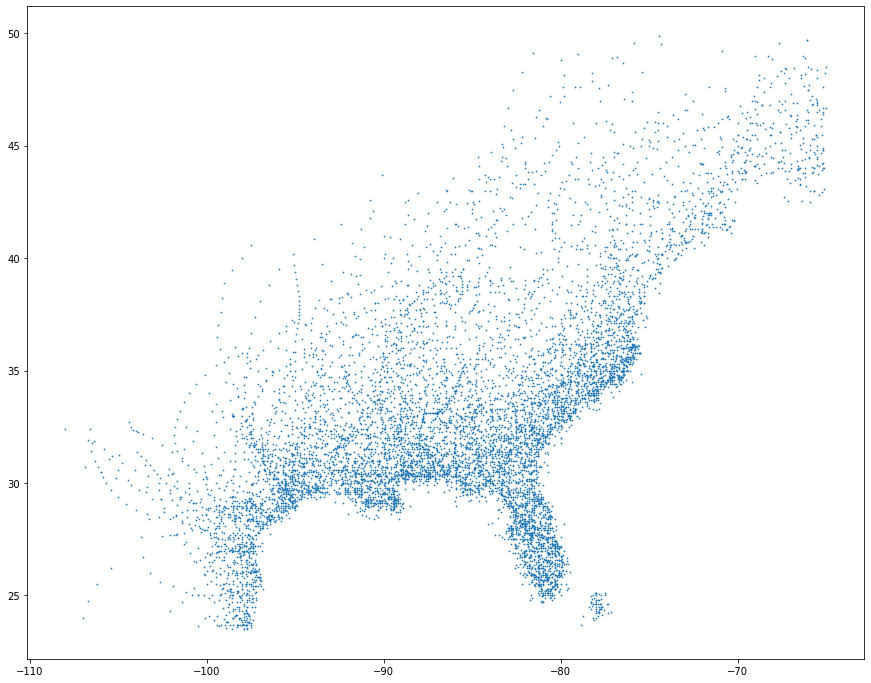

In [13]:
plt.figure(figsize= (15,12))
plt.scatter(x = ec["longitude"],
           y = ec["latitude"],
           s = 0.5);

In [14]:
geodf = gpd.GeoDataFrame(
    ec, geometry=gpd.points_from_xy(ec["longitude"], ec["latitude"]))
# df = geopandas.read_file(geopandas.datasets.get_path())
geodf.head()

,storm_id,year,name,iso_time,nature,latitude,longitude,wmo_wind(knots),wmo_pressure(mb),wmo_agency,dist2land(km),landfall(km),usa_lat,usa_lon,usa_status,usa_wind,usa_pres,storm_category,sea_height(ft),storm_speed(knots),storm_direction(degrees),geometry
0,1851175N26270,1851,NOT_NAMED,1851-06-25 21:00:00,TS,28.1333,-96.5667,80.0,NaN,hurdat_atl,22,0.0,28.2000,-96.8000,hurricane,80.0,NaN,1.0,NaN,5.0,286.0,POINT (-96.56670 28.13330)
1,1851175N26270,1851,NOT_NAMED,1851-06-26 00:00:00,TS,28.1667,-96.8000,70.0,NaN,hurdat_atl,0,0.0,28.2000,-97.0000,hurricane,70.0,NaN,1.0,NaN,5.0,282.0,POINT (-96.80000 28.16670)
2,1851175N26270,1851,NOT_NAMED,1851-06-26 03:00:00,TS,28.2265,-97.0793,NaN,NaN,NaN,0,0.0,28.2398,-97.2727,hurricane,65.0,NaN,1.0,NaN,5.0,284.0,POINT (-97.07930 28.22650)
3,1851175N26270,1851,NOT_NAMED,1851-06-26 06:00:00,TS,28.3000,-97.4000,60.0,NaN,hurdat_atl,0,0.0,28.3000,-97.6000,tropical storm,60.0,NaN,0.0,NaN,6.0,283.0,POINT (-97.40000 28.30000)
4,1851175N26270,1851,NOT_NAMED,1851-06-26 09:00:00,TS,28.3617,-97.7476,NaN,NaN,NaN,0,0.0,28.3425,-97.9501,tropical storm,60.0,NaN,0.0,NaN,6.0,282.0,POINT (-97.74760 28.36170)


In [15]:
usa = gpd.read_file('../maps/states_21basic/states.shp')
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [16]:
def point_location(df1, df2, col1, new_column = None):
    # empty list
    location_dict = {}
    # iterate through hurricane points
    for point_index, point in df1["geometry"].iteritems():
        # iterate through our location dataframe
        
        for index, location in df2["geometry"].iteritems():
            if point.within(location) == True:
                location_dict[point_index] = df2[col1][index]
                
    
    
    return location_dict

In [17]:
storm_states = point_location(geodf, usa, "STATE_NAME")
indecies_to_keep = list(storm_states.keys())
states_list = list(storm_states.values())
geodf = geodf.loc[indecies_to_keep, :]
geodf["state"] = states_list
geodf.reset_index(inplace = True, drop = True)
geodf.shape

(7155, 23)

In [18]:
ec.iloc[17,:]

storm_id                               1851228N13313
year                                            1851
name                                       NOT_NAMED
iso_time                         1851-08-23 21:00:00
nature                                            TS
latitude                                     29.9333
longitude                                   -85.6666
wmo_wind(knots)                                  100
wmo_pressure(mb)                                 NaN
wmo_agency                                hurdat_atl
dist2land(km)                                     22
landfall(km)                                       0
usa_lat                                         30.1
usa_lon                                        -85.7
usa_status                                 hurricane
usa_wind                                         100
usa_pres                                         NaN
storm_category                                     3
sea_height(ft)                                

In [19]:
usa[usa["STATE_NAME"] == 'Texas']

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
40,Texas,41,48,West South Central,TX,"MULTIPOLYGON (((-105.99889 31.39394, -106.2132..."


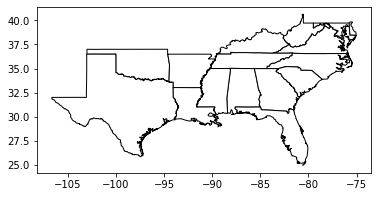

In [20]:
usa.loc[(usa["SUB_REGION"] == 'South Atlantic') | (usa["SUB_REGION"] == 'East South Central')
        | (usa["SUB_REGION"] == 'West South Central') , :].plot(color='white', edgecolor='black');

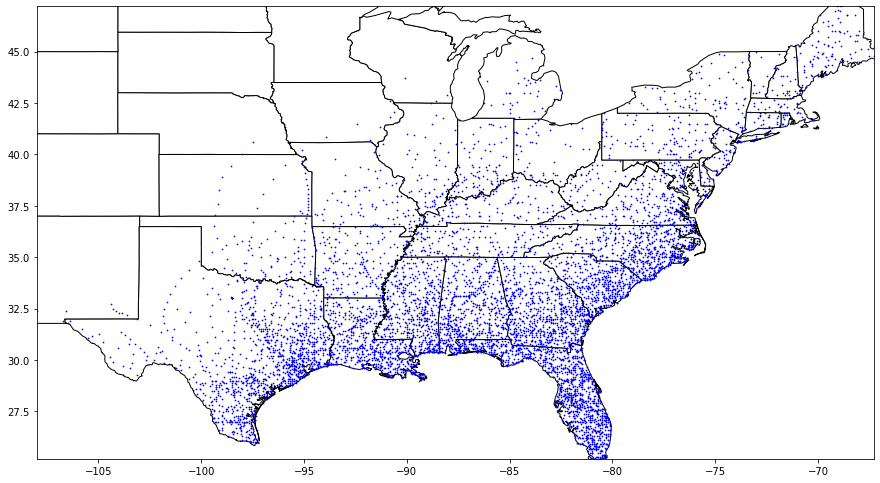

In [21]:
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# # We restrict to North America.
# north_america = world[world.continent == 'North America'].plot(
#     color='white', edgecolor='black', figsize = (11,10))

minx, miny, maxx, maxy = geodf.total_bounds

usa_ax = usa.plot(color='white', edgecolor='black', figsize = (15,12))



geodf.plot(ax = usa_ax, color="blue", markersize = 0.5)
usa_ax.set_xlim(minx, maxx)
usa_ax.set_ylim(miny, maxy)

plt.show();

In [22]:
ec["storm_category"].value_counts()

-1.0    3313
 0.0    3109
-4.0    1121
 1.0     706
 2.0     291
-3.0     250
 3.0     135
-2.0     112
 4.0      62
 5.0      10
Name: storm_category, dtype: int64

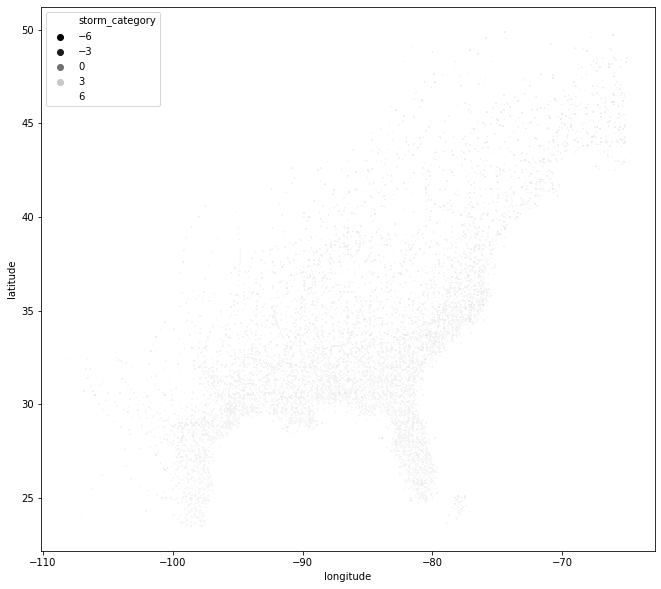

In [23]:
plt.figure(figsize= (11,10))
sns.scatterplot(x = ec["longitude"],
                y = ec["latitude"],
                s = 1,
                hue = ec["storm_category"],
                palette = "gist_gray");

In [24]:
ec.head()

,storm_id,year,name,iso_time,nature,latitude,longitude,wmo_wind(knots),wmo_pressure(mb),wmo_agency,dist2land(km),landfall(km),usa_lat,usa_lon,usa_status,usa_wind,usa_pres,storm_category,sea_height(ft),storm_speed(knots),storm_direction(degrees),geometry
0,1851175N26270,1851,NOT_NAMED,1851-06-25 21:00:00,TS,28.1333,-96.5667,80.0,NaN,hurdat_atl,22,0.0,28.2000,-96.8000,hurricane,80.0,NaN,1.0,NaN,5.0,286.0,POINT (-96.56670 28.13330)
1,1851175N26270,1851,NOT_NAMED,1851-06-26 00:00:00,TS,28.1667,-96.8000,70.0,NaN,hurdat_atl,0,0.0,28.2000,-97.0000,hurricane,70.0,NaN,1.0,NaN,5.0,282.0,POINT (-96.80000 28.16670)
2,1851175N26270,1851,NOT_NAMED,1851-06-26 03:00:00,TS,28.2265,-97.0793,NaN,NaN,NaN,0,0.0,28.2398,-97.2727,hurricane,65.0,NaN,1.0,NaN,5.0,284.0,POINT (-97.07930 28.22650)
3,1851175N26270,1851,NOT_NAMED,1851-06-26 06:00:00,TS,28.3000,-97.4000,60.0,NaN,hurdat_atl,0,0.0,28.3000,-97.6000,tropical storm,60.0,NaN,0.0,NaN,6.0,283.0,POINT (-97.40000 28.30000)
4,1851175N26270,1851,NOT_NAMED,1851-06-26 09:00:00,TS,28.3617,-97.7476,NaN,NaN,NaN,0,0.0,28.3425,-97.9501,tropical storm,60.0,NaN,0.0,NaN,6.0,282.0,POINT (-97.74760 28.36170)


In [28]:
covid_and_hurr = pd.read_csv("../data/covid_and_hurricanes.csv")
covid_and_hurr.head()

,state,county,cat_1_count,cat_2_count,cat_3_count,cat_4_count,cat_5_count,hurricane_count,tropical_storm_count,extratropical_system_count,tropical_depression_count,low_count,subtropical_depression_count,dissipating_storm_count,cases,previous_cases,2019_population,change_in_case_ratio
0,Texas,Calhoun,2,3,1,0,0,6,2,0,5,0,0,0,546.0,493.0,21290.0,249.0
1,Texas,Refugio,3,1,2,0,0,6,5,0,1,0,0,0,234.0,214.0,6948.0,287.9
2,Texas,Bee,1,0,0,0,0,1,8,0,2,0,0,0,1246.0,669.0,32565.0,1771.8
3,Texas,Live Oak,0,0,0,0,0,0,4,0,3,0,0,0,230.0,207.0,NaN,NaN
4,Texas,McMullen,0,0,0,0,0,1,7,0,7,0,0,0,9.0,8.0,743.0,134.6


In [29]:
covid_and_hurr.shape

(1557, 18)